In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.metrics import plot_confusion_matrix


In [2]:
import imblearn
print(imblearn.__version__)

0.9.0


In [3]:
# load and summarize the dataset
from pandas import read_csv
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std


In [4]:
# define the dataset location
df = pd.read_excel('datafred.xlsx', sheet_name= "DATACOMPLETA") 

#NAN checks

rows_with_nan = [index for index, row in df.iterrows() if row.isnull().any()]

print(rows_with_nan)

df= df.dropna()
len(df)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 20, 21, 24, 27, 42, 44, 51, 57, 61, 62, 63, 66, 82, 87, 88, 94, 98, 99, 100, 103, 110, 112, 117, 119, 120, 121, 123, 124, 128, 129, 130, 133, 134, 135, 141, 142, 143, 164, 169, 172, 177, 180, 183, 184, 186, 197, 198, 201, 203, 204, 205, 206, 207, 209, 210, 213, 214, 216, 217]


147

In [5]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['Genero'] = labelencoder.fit_transform(df['Genero'])
df['ApoE_genotipo'] = labelencoder.fit_transform(df['ApoE_genotipo'])
df['ApoE2masmenos'] = labelencoder.fit_transform(df['ApoE2masmenos'])
df['ApoE4masmenos'] = labelencoder.fit_transform(df['ApoE4masmenos'])
df['MAPT_genotipo'] = labelencoder.fit_transform(df['MAPT_genotipo'])
df.head(5)
#MALE = 1, FEMALE = 0

,Diagnostico,Genero,Edad,Escolaridad,IL_2,IL_6,IL_10,TNFa,SAP,CRP,...,T_ADLQ_I_Basic,T_ADLQ_I_Instrumental,T_ADLQ_I_Advanced,MiniSea_MiniSea_Total_FauxPas,MiniSea_MiniSea_Total_EkmanFaces,MiniSea_minisea_total,RCF_Time,RCF_Total_Score,TMT_A_Time,TMT_B_Time
0,0.0,1,78.0,12.0,0.00000,0.24500,5.2900,14.0500,4154.0,384.0,...,0.0,0.158730,0.750000,11.250,12.000,23.250,176.0,31.0,75.0,175.0
11,0.0,1,76.0,3.0,0.22455,0.00000,2.4318,3.6735,7742.0,1874.0,...,0.0,0.174603,0.333333,7.875,12.000,19.875,332.0,34.0,142.0,155.0
13,0.0,0,72.0,8.0,0.65110,0.00175,63.5570,8.2975,6024.0,16338.0,...,0.0,0.017544,0.000000,12.000,10.714,22.714,177.0,31.0,73.0,184.0
15,0.0,0,75.0,12.0,0.09315,1.78310,2.7463,10.2875,8774.0,45218.0,...,0.0,0.174603,0.416667,10.875,10.286,21.161,223.0,15.5,100.0,300.0
16,0.0,0,76.0,17.0,0.27530,0.00000,1.5492,7.4602,7092.0,2380.0,...,0.0,0.079365,0.200000,14.625,13.286,27.911,357.0,18.5,67.0,93.0


In [6]:
#Separación de la data
df_data = df.drop(['Diagnostico'],axis = 1)
df_target = df['Diagnostico']
X, y = df_data, df_target
X = X.values
y = y.values

Class=0, n=56 (25.000%)
Class=3, n=56 (25.000%)
Class=1, n=56 (25.000%)
Class=2, n=56 (25.000%)


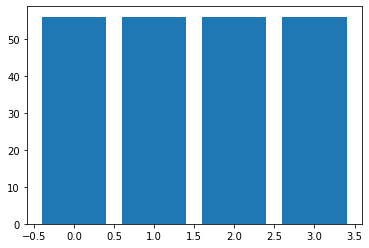

In [7]:
from imblearn.over_sampling import SMOTE
# label encode the target variable
y = LabelEncoder().fit_transform(y)

# transform the dataset
strategy = {0:56, 1:56, 2:56, 3:56}
oversample = SMOTE(sampling_strategy=strategy)
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [8]:
# evaluate a model
def evaluate_model(X, y, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define the model
model = RandomForestClassifier(n_estimators=1000, class_weight='balanced')
# evaluate the model
scores = evaluate_model(X, y, model)
# summarize performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.921 (0.029)


Otros Modelos con Oversampling

In [9]:
from sklearn.preprocessing import MinMaxScaler  
# Train/test sets
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=1121218
)


In [10]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [11]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 35)
 
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_

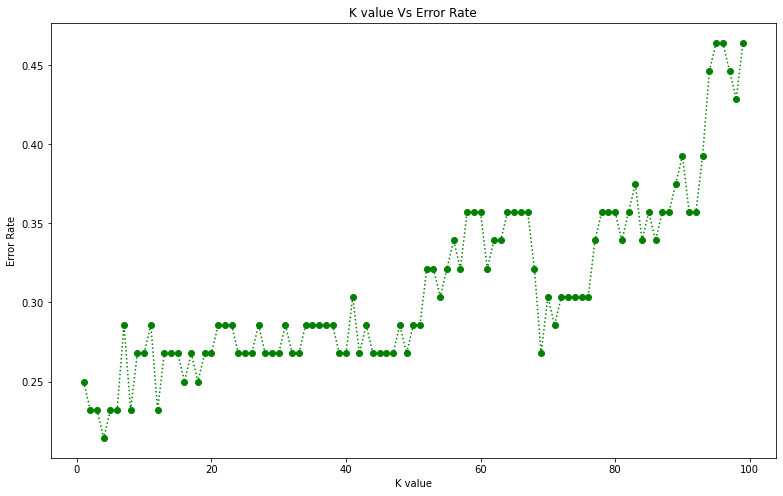

In [12]:
error_rate=[]
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(13,8))
plt.plot(range(1,100), error_rate, linestyle = 'dotted', marker = 'o',color = 'g')
plt.xlabel('K value')
plt.ylabel('Error Rate')
plt.title('K value Vs Error Rate')
plt.show() 

C:\ProgramData\Anaconda3\Conda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.71      1.00      0.83        20
           1       0.71      0.38      0.50        13
           2       0.83      0.50      0.62        10
           3       0.87      1.00      0.93        13

    accuracy                           0.77        56
   macro avg       0.78      0.72      0.72        56
weighted avg       0.77      0.77      0.74        56



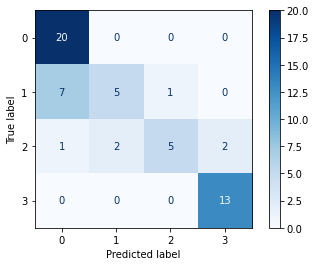

In [13]:
from sklearn.metrics import classification_report
model = KNeighborsClassifier(n_neighbors= 2 ).fit(x_train,y_train)
pred = model.predict(x_test)
plot_confusion_matrix(model,x_test,y_test,cmap=plt.cm.Blues)
print(classification_report(y_test,pred))

C:\ProgramData\Anaconda3\Conda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.70      0.70      0.70        20
           1       0.50      0.38      0.43        13
           2       0.55      0.60      0.57        10
           3       0.87      1.00      0.93        13

    accuracy                           0.68        56
   macro avg       0.65      0.67      0.66        56
weighted avg       0.66      0.68      0.67        56



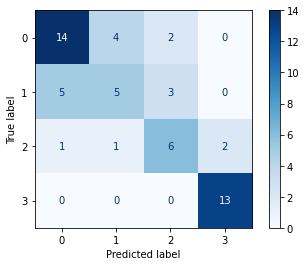

In [14]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train,y_train)

pred = dt.predict(x_test)
plot_confusion_matrix(dt,x_test,y_test,cmap=plt.cm.Blues)
print(classification_report(y_test,pred))

C:\ProgramData\Anaconda3\Conda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.79      0.75      0.77        20
           1       0.62      0.38      0.48        13
           2       0.47      0.80      0.59        10
           3       0.92      0.85      0.88        13

    accuracy                           0.70        56
   macro avg       0.70      0.70      0.68        56
weighted avg       0.72      0.70      0.70        56



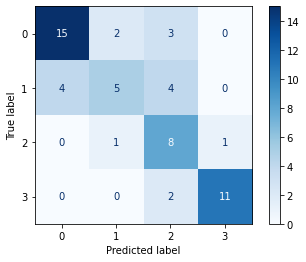

In [15]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

pred = gnb.predict(x_test)
plot_confusion_matrix(gnb,x_test,y_test,cmap=plt.cm.Blues)
print(classification_report(y_test,pred))

C:\ProgramData\Anaconda3\Conda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.84      0.80      0.82        20
           1       0.80      0.62      0.70        13
           2       0.67      1.00      0.80        10
           3       1.00      0.92      0.96        13

    accuracy                           0.82        56
   macro avg       0.83      0.83      0.82        56
weighted avg       0.84      0.82      0.82        56



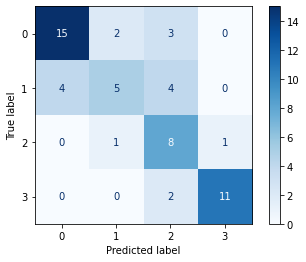

In [16]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier()
hgb.fit(x_train,y_train)

pred = hgb.predict(x_test)
plot_confusion_matrix(gnb,x_test,y_test,cmap=plt.cm.Blues)
print(classification_report(y_test,pred))